In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"D:\Diwali Sales Data.csv",encoding="unicode_escape")

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# drop unnecessary columns
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [9]:
# check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
#drop null values
df.dropna(inplace=True)

In [11]:
# change data type
df["Amount"]=df["Amount"].astype("int")

In [12]:
df["Amount"].dtypes

dtype('int64')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [15]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [17]:
df["Gender"].value_counts()

Gender
F    7832
M    3407
Name: count, dtype: int64

In [102]:
x = df["Gender"].value_counts().index
y = df["Gender"].value_counts().values

# Sales by Gender

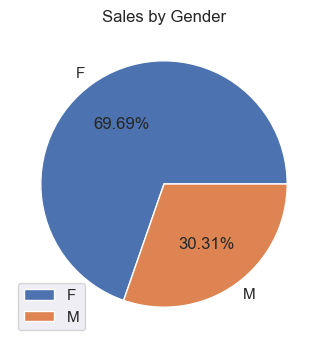

In [105]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,autopct="%0.2f%%")
plt.legend(loc=3)
plt.title("Sales by Gender")
plt.show()

# Sales by Age Group

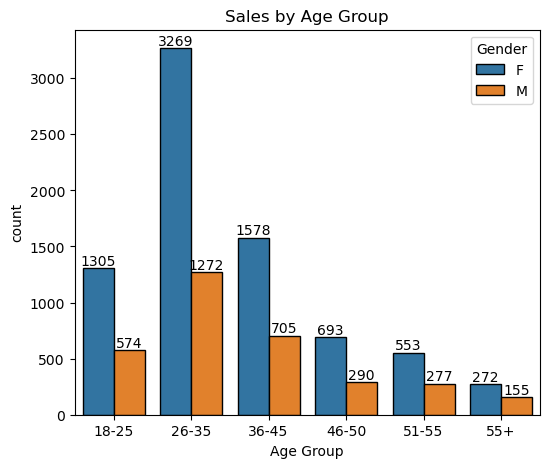

In [39]:
plt.figure(figsize=(6,5))
age_order = ["18-25", "26-35", "36-45", "46-50","51-55", "55+"]
ax = sns.countplot(x="Age Group", data=df, hue="Gender",order=age_order,edgecolor="Black")
plt.title("Sales by Age Group")

for container in ax.containers:
    ax.bar_label(container)

plt.show()


INSIGHT: From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

# SALES BY STATE

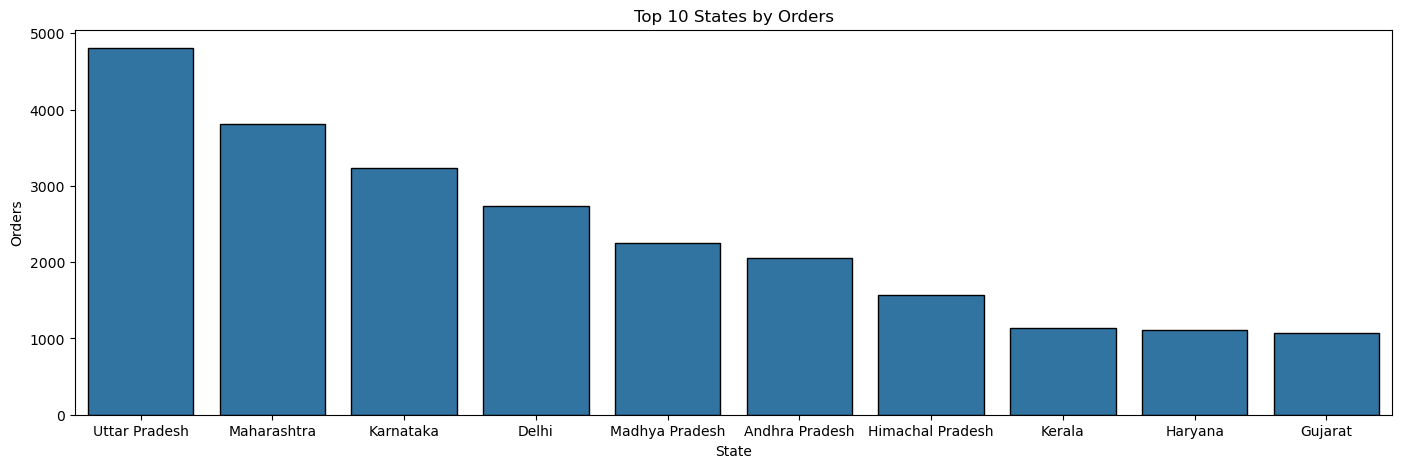

In [38]:
#Top 10 states by orders
sales_state = (df.groupby("State", as_index=False)["Orders"].sum().nlargest(10, "Orders"))

plt.figure(figsize=(17,5))
sns.barplot(x="State", y="Orders", data=sales_state,edgecolor="Black")
plt.title("Top 10 States by Orders")
plt.show()


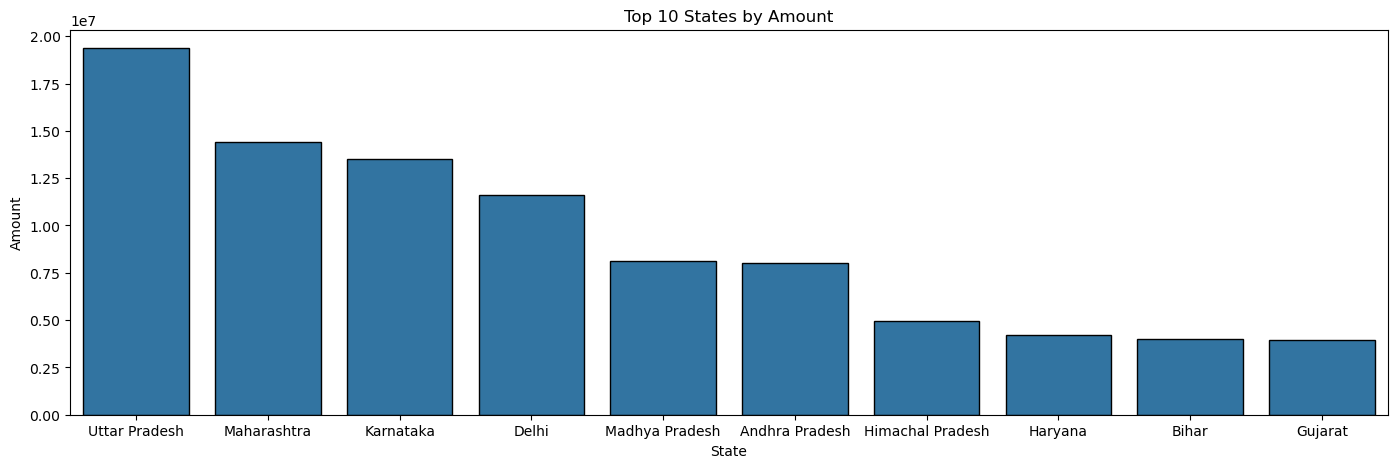

In [37]:
#Top 10 states by Amount
sales_state = (df.groupby("State", as_index=False)["Amount"].sum().nlargest(10, "Amount"))

plt.figure(figsize=(17,5))
sns.barplot(x="State", y="Amount", data=sales_state,edgecolor="Black")
plt.title("Top 10 States by Amount")
plt.show()

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

# Marital Status

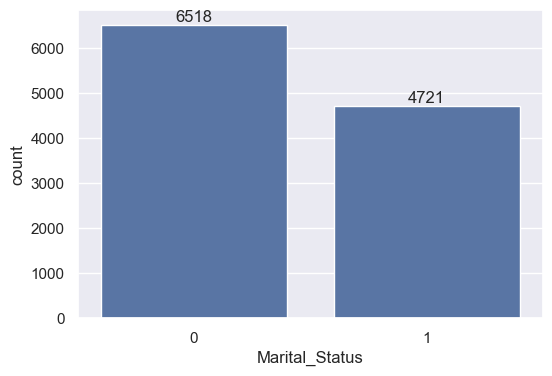

In [59]:
x=sns.countplot(data=df,x="Marital_Status")
sns.set(rc={"figure.figsize":(3,3)})
for bars in x.containers:
    x.bar_label(bars)

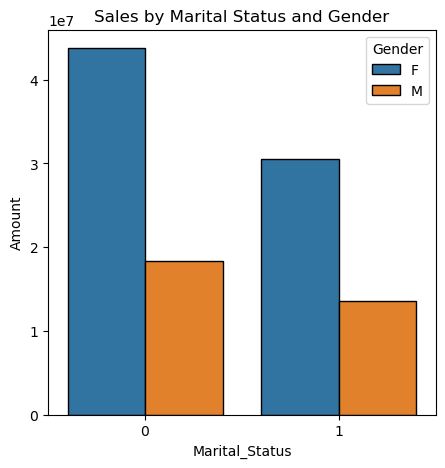

In [50]:
sales_state = (
    df.groupby(["Marital_Status","Gender"], as_index=False)["Amount"]
      .sum()
)

plt.figure(figsize=(5,5))
sns.barplot(x="Marital_Status", y="Amount", hue="Gender",
            data=sales_state, edgecolor="black")
plt.title("Sales by Marital Status and Gender")
plt.show()

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

# Occupation

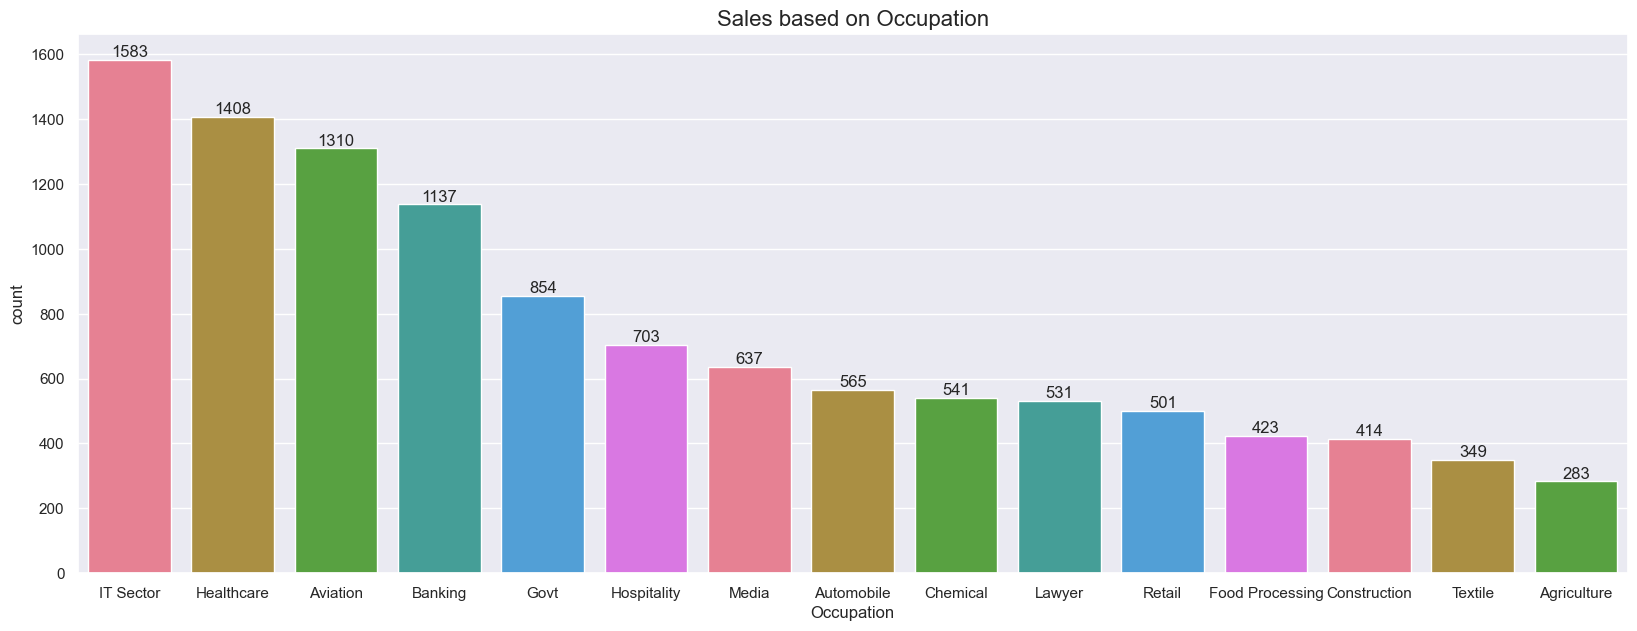

In [77]:
palette = sns.color_palette("husl")
order = df['Occupation'].value_counts().index
plt.title("Sales based on Occupation",fontsize=16)
x=sns.countplot(data=df,x="Occupation",palette=palette,order=order)
sns.set(rc={"figure.figsize":(20,7)})
for bars in x.containers:
    x.bar_label(bars)

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

# Product Category

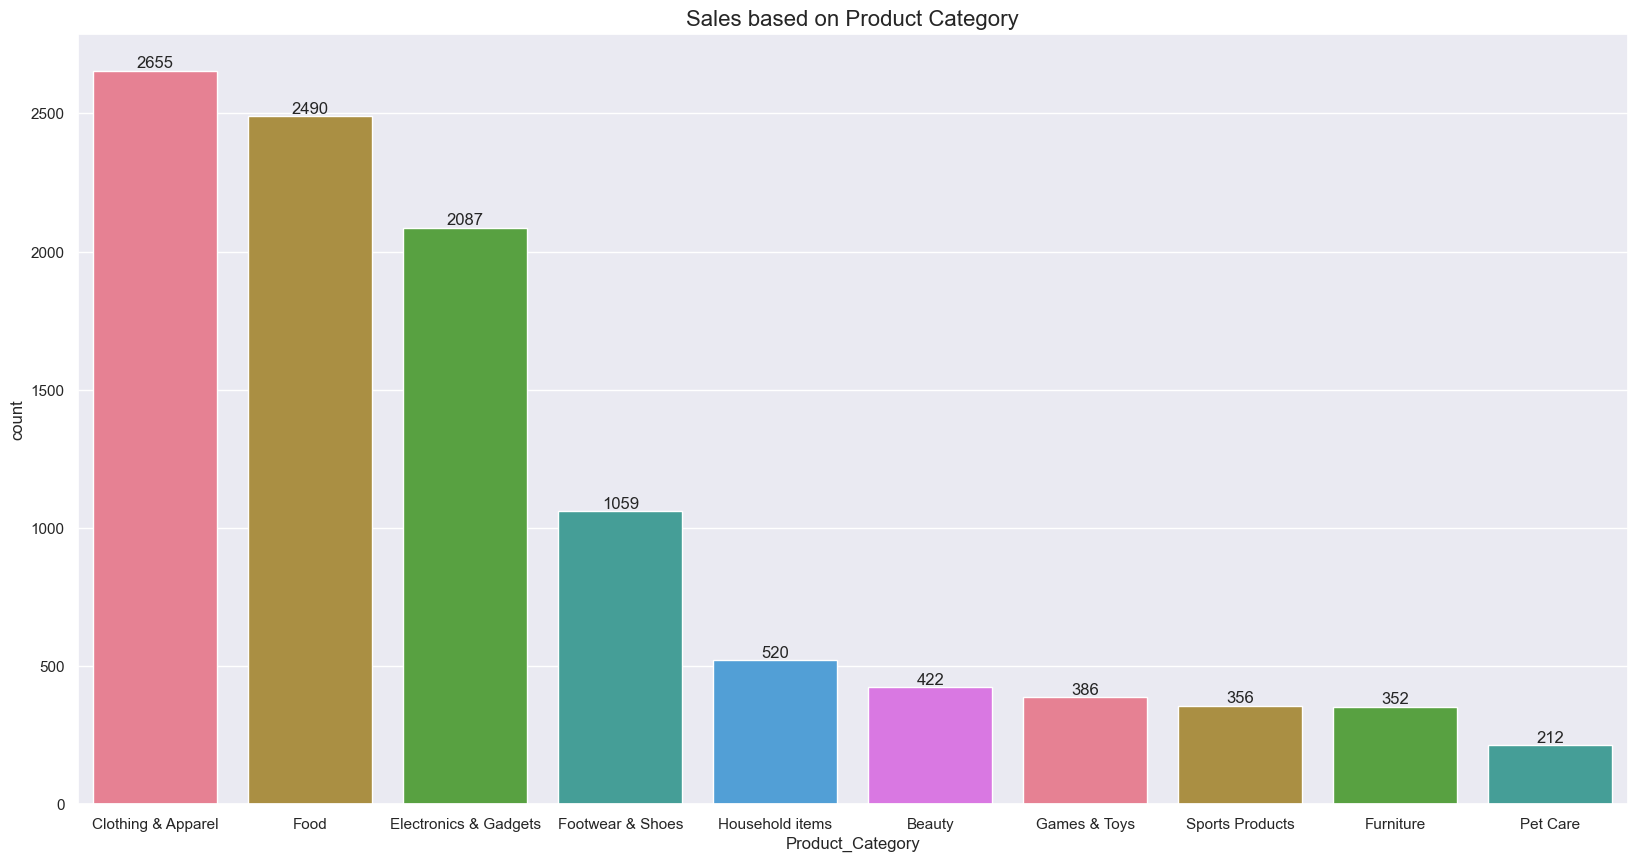

In [90]:
palette = sns.color_palette("husl")
order = df['Product_Category'].value_counts().index[:10]
plt.title("Sales based on Product Category",fontsize=16)
x=sns.countplot(data=df,x="Product_Category",palette=palette,order=order)
sns.set(rc={"figure.figsize":(20,10)})
for bars in x.containers:
    x.bar_label(bars)

From above graph we can see that most of the sold products are from Clothing & Apparel, Food and Electronics & Gadgets

# CONCLUSION

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food,
Clothing and Electronics category.